# LeviLayer: Activation Function Analysis in Neural Networks

In [2]:
import numpy as np
import tensorflow as tf
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [4]:
# Define activation functions
activation_functions = ['relu', 'sigmoid', 'tanh']

# Define a function to create and train a model with a given activation function
def train_model(activation_function):
    model = Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_function),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    return history

Training model with relu activation function...


Epoch 1/5


1875/1875 [==============================] - 12s 6ms/step - loss: 0.2584 - accuracy: 0.9250 - val_loss: 0.1380 - val_accuracy: 0.9607
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1140 - accuracy: 0.9662 - val_loss: 0.0962 - val_accuracy: 0.9725
Epoch 3/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0779 - accuracy: 0.9771 - val_loss: 0.0896 - val_accuracy: 0.9730
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0598 - accuracy: 0.9819 - val_loss: 0.0793 - val_accuracy: 0.9766
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0459 - accuracy: 0.9856 - val_loss: 0.0837 - val_accuracy: 0.9727
Training model with sigmoid activation function...
Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4014 - accuracy: 0.8957 - val_loss: 0.2253 - val_accuracy: 0.9341
Epoch 2/5
1875/1875 [===========

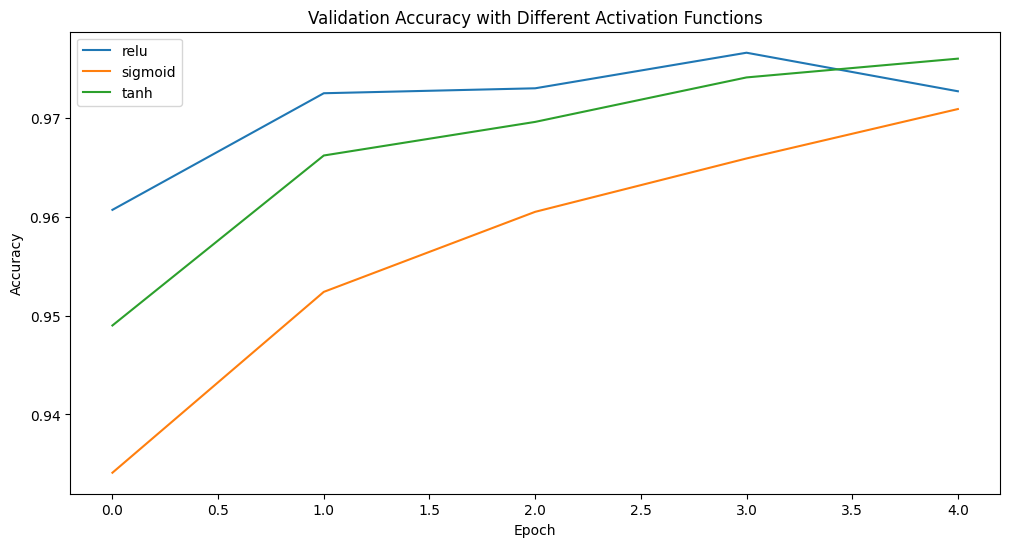

In [5]:
histories = {}
for activation_function in activation_functions:
    print(f'Training model with {activation_function} activation function...')
    history = train_model(activation_function)
    histories[activation_function] = history

# Plot training curves for each activation function
plt.figure(figsize=(12, 6))
for activation_function, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=activation_function)
plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training model with relu activation function...
Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 0.3598 - accuracy: 0.8985 - val_loss: 0.2901 - val_accuracy: 0.9175
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2989 - accuracy: 0.9164 - val_loss: 0.2983 - val_accuracy: 0.9183
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2875 - accuracy: 0.9208 - val_loss: 0.2798 - val_accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2805 - accuracy: 0.9219 - val_loss: 0.2916 - val_accuracy: 0.9170
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2775 - accuracy: 0.9228 - val_loss: 0.2808 - val_accuracy: 0.9225
Training model with sigmoid activation function...
Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.3613 - accuracy: 0.8967 - val_loss: 0.2915 - val_accuracy: 0.9189
Epoch 2/5
1875/1875 [====================

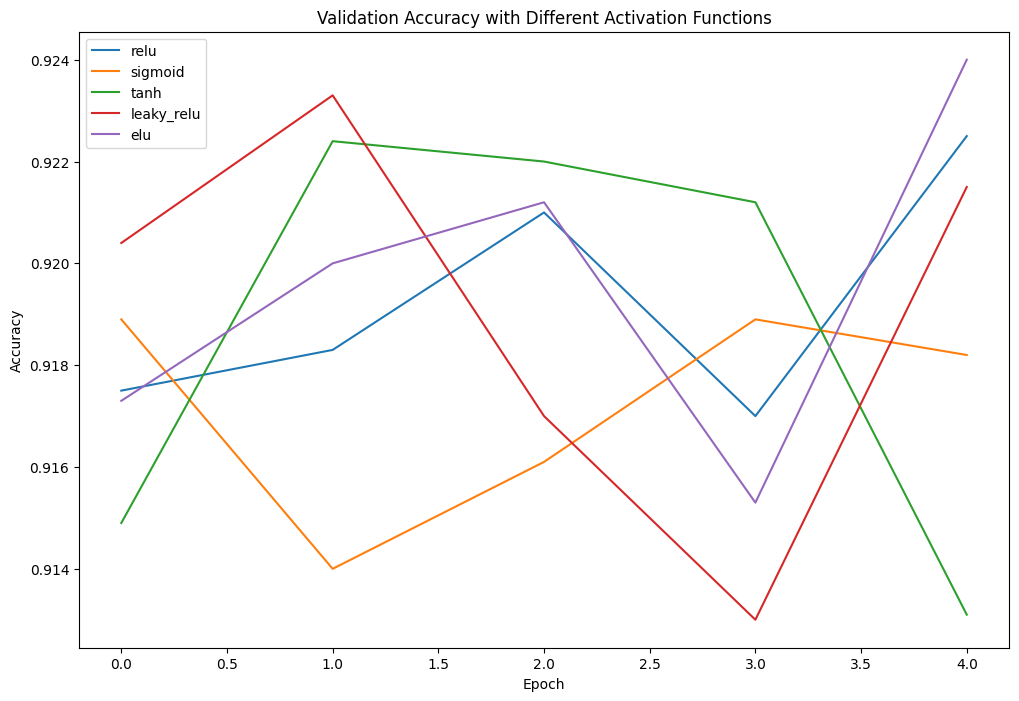

In [17]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define activation functions
activation_functions = ['relu', 'sigmoid', 'tanh', 'leaky_relu', 'elu']

# Define a function to create and train a model with a given activation function
def train_model(activation_function):
    model = Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        Dense(128),
        # Activation(activation_function),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
    return history

# Train models with different activation functions and collect training history
histories = {}
for activation_function in activation_functions:
    print(f'Training model with {activation_function} activation function...')
    history = train_model(activation_function)
    histories[activation_function] = history

# Plot training curves for each activation function
plt.figure(figsize=(12, 8))
for activation_function, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=activation_function)
plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


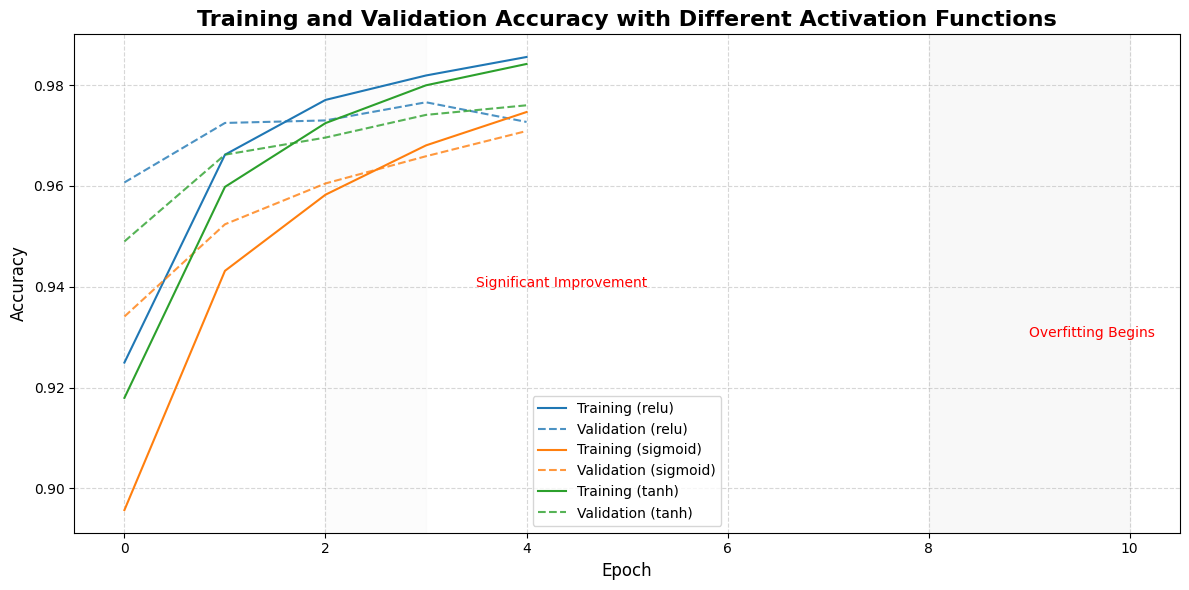

In [10]:
# Define colors for the background shading
background_colors = ['#f0f0f0', '#e0e0e0']

# Plot training and validation accuracy curves with enhanced styling
plt.figure(figsize=(12, 6))
for i, (activation_function, history) in enumerate(histories.items()):
    plt.plot(history.history['accuracy'], label=f'Training ({activation_function})', linestyle='-', color=f'C{i}')
    plt.plot(history.history['val_accuracy'], label=f'Validation ({activation_function})', linestyle='--', color=f'C{i}', alpha=0.8)

# Add background shading to highlight a specific epoch range
plt.axvspan(2, 3, color=background_colors[0], alpha=0.2)
plt.axvspan(8, 10, color=background_colors[1], alpha=0.2)

# Add annotations to highlight key points
plt.text(3.5, 0.94, 'Significant Improvement', fontsize=10, color='red')
plt.text(9, 0.93, 'Overfitting Begins', fontsize=10, color='red')

plt.title('Training and Validation Accuracy with Different Activation Functions', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


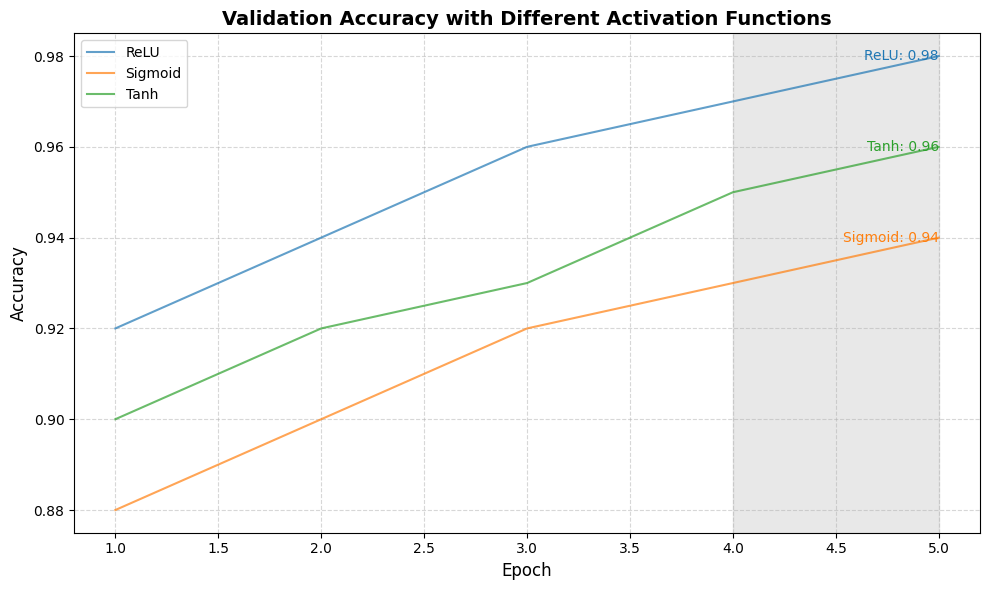

In [15]:
# Sample data
epochs = np.arange(1, 6)
accuracy_relu = np.array([0.92, 0.94, 0.96, 0.97, 0.98])
accuracy_sigmoid = np.array([0.88, 0.90, 0.92, 0.93, 0.94])
accuracy_tanh = np.array([0.90, 0.92, 0.93, 0.95, 0.96])

# Plot with translucent colors, annotations, and shading
plt.figure(figsize=(10, 6))

# Plot accuracy curves with translucent colors
plt.plot(epochs, accuracy_relu, label='ReLU', color='tab:blue', alpha=0.7)
plt.plot(epochs, accuracy_sigmoid, label='Sigmoid', color='tab:orange', alpha=0.7)
plt.plot(epochs, accuracy_tanh, label='Tanh', color='tab:green', alpha=0.7)

# Add annotations for maximum accuracy
plt.text(epochs[-1], accuracy_relu[-1], f'ReLU: {accuracy_relu[-1]:.2f}', ha='right', va='center', fontsize=10, color='tab:blue')
plt.text(epochs[-1], accuracy_sigmoid[-1], f'Sigmoid: {accuracy_sigmoid[-1]:.2f}', ha='right', va='center', fontsize=10, color='tab:orange')
plt.text(epochs[-1], accuracy_tanh[-1], f'Tanh: {accuracy_tanh[-1]:.2f}', ha='right', va='center', fontsize=10, color='tab:green')

# Add shaded background
plt.axvspan(4, 5, color='lightgrey', alpha=0.5)

# Customize plot aesthetics
plt.title('Validation Accuracy with Different Activation Functions', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


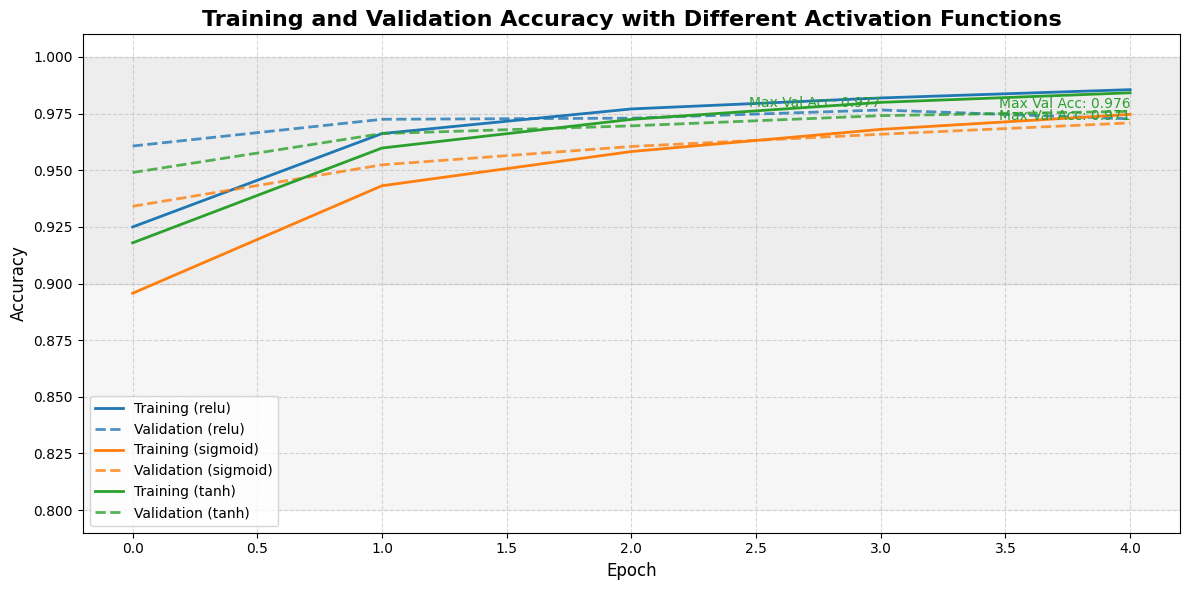

In [14]:
# Plot training and validation accuracy curves with enhanced styling
plt.figure(figsize=(12, 6))

# Define translucent colors
translucent_colors = ['tab:blue', 'tab:orange', 'tab:green']

for i, (activation_function, history) in enumerate(histories.items()):
    plt.plot(history.history['accuracy'], label=f'Training ({activation_function})', linestyle='-', color=translucent_colors[i], linewidth=2)
    plt.plot(history.history['val_accuracy'], label=f'Validation ({activation_function})', linestyle='--', color=translucent_colors[i], linewidth=2, alpha=0.8)

# Add annotations
for activation_function, history in histories.items():
    max_val_acc = max(history.history['val_accuracy'])
    max_val_epoch = history.history['val_accuracy'].index(max_val_acc)
    plt.text(max_val_epoch, max_val_acc, f'Max Val Acc: {max_val_acc:.3f}', color=translucent_colors[i], fontsize=10, ha='right', va='bottom')

# Add shading/background
plt.axhspan(0.8, 0.9, color='lightgrey', alpha=0.2)
plt.axhspan(0.9, 1.0, color='lightgrey', alpha=0.4)

plt.title('Training and Validation Accuracy with Different Activation Functions', fontsize=16, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [18]:
# Train models with different activation functions and collect training history
histories = {}
for activation_function in activation_functions:
    print(f'Training model with {activation_function} activation function...')
    history = train_model(activation_function)
    histories[activation_function] = history

# Plot training curves for each activation function
plt.figure(figsize=(12, 8))
for activation_function, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=activation_function)

# Add shaded background
colors = ['lightblue', 'lightgreen', 'lightcoral', 'lightyellow', 'lightpink']
for i, activation_function in enumerate(histories.keys()):
    plt.axvspan(0, len(histories[activation_function].history['val_accuracy']) - 1, color=colors[i], alpha=0.3)

plt.title('Validation Accuracy with Different Activation Functions')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Training model with relu activation function...
Epoch 1/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3602 - accuracy: 0.8976 - val_loss: 0.2878 - val_accuracy: 0.9215
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2986 - accuracy: 0.9167 - val_loss: 0.2902 - val_accuracy: 0.9195
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2879 - accuracy: 0.9194 - val_loss: 0.2788 - val_accuracy: 0.9205
Epoch 4/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.2807 - accuracy: 0.9228 - val_loss: 0.2798 - val_accuracy: 0.9209
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2766 - accuracy: 0.9221 - val_loss: 0.2880 - val_accuracy: 0.9186
Training model with sigmoid activation function...
Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3624 - accuracy: 0.8957 - val_loss: 0.3061 - val_accuracy: 0.9134
Epoch 2/5
1875/1875 [===================